<a href="https://colab.research.google.com/github/obarnstedt/LINdoscope2023/blob/main/notebooks/intro_to_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Python
This notebook serves as a brief(!) introduction into basic Python functionality, and how it can be used most effectively to handle basic data relevant to neuroscience.

The focus here is on introducing some pandas functionality, statistics, and interactive plotting.

It was written by [Oliver Barnstedt](https://github.com/obarnstedt) for [LINdoscope 2023](https://www.lindoscope.com).

In [1]:
# Installing packages not included in Colab
!pip install --upgrade bokeh==2.4.3  # Bokeh 3 is currently incompatible with pandas-bokeh
!pip install pandas-bokeh
!pip install pingouin
!pip install dabest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.2.2
    Uninstalling bokeh-3.2.2:
      Successfully uninstalled bokeh-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.2.2 requires bokeh<3.3.0,>=3.1.1, but you have bokeh 2.4.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=ace4b99347579490bdf5084be099a203e13be9edf5a35a475e1b2f180d383df4
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 2.7 MB/s eta 0:00:00


# Lists and dictionaries

In [4]:
a_list = [1, 2, 3, 4]
a_list

[1, 2, 3, 4]

In [5]:
a_list[0]  # selecting the first list element

1

In [6]:
a_list + 3  # this will throw an error message

TypeError: ignored

In [7]:
[a + 3 for a in a_list]  # this is how you manipulate list elements

[4, 5, 6, 7]

In [8]:
a_dictionary = {'a': 1, 'b': 2, 'c': 3}
a_dictionary

{'a': 1, 'b': 2, 'c': 3}

In [9]:
a_dictionary[0]  # this throws an error; dictionary elements have no true order

KeyError: ignored

In [10]:
a_dictionary['a']

1

In [11]:
for key, value in a_dictionary.items():  # iterating over a dictionary
  print(f'key: {key}; value: {value}')

key: a; value: 1
key: b; value: 2
key: c; value: 3


# Data handling

In [12]:
import numpy as np  # comprehensive package for numeric array calculations
import pandas as pd  # numpy-based dataframe calculations

In [13]:
array = np.random.rand(20, 4)
array

array([[0.41399831, 0.158897  , 0.40062   , 0.21029133],
       [0.44086633, 0.16001874, 0.1547432 , 0.38121663],
       [0.50840745, 0.80608644, 0.27749922, 0.46451207],
       [0.86780011, 0.21743348, 0.42796821, 0.00881889],
       [0.393876  , 0.55810451, 0.59163528, 0.68763191],
       [0.46551757, 0.95058259, 0.72194874, 0.06862963],
       [0.36978565, 0.27308424, 0.89869561, 0.43802487],
       [0.98950389, 0.55695818, 0.28202245, 0.95550459],
       [0.55837765, 0.26073526, 0.80488037, 0.96233587],
       [0.79851176, 0.11993406, 0.35453068, 0.24153241],
       [0.92902555, 0.97195533, 0.64947789, 0.86453308],
       [0.30973652, 0.62382195, 0.60158876, 0.68740498],
       [0.33833415, 0.62705838, 0.26754722, 0.46131349],
       [0.67259489, 0.84975778, 0.28109279, 0.57247472],
       [0.3536714 , 0.94307748, 0.28566457, 0.02453012],
       [0.09840852, 0.66147862, 0.98731781, 0.30936012],
       [0.72241808, 0.10213108, 0.90459274, 0.5059383 ],
       [0.89817183, 0.1411287 ,

In [14]:
df = pd.DataFrame(data=array, index=range(20), columns=['col1', 'col2', 'col3', 'col4'])
df

,col1,col2,col3,col4
0,0.413998,0.158897,0.400620,0.210291
1,0.440866,0.160019,0.154743,0.381217
2,0.508407,0.806086,0.277499,0.464512
3,0.867800,0.217433,0.427968,0.008819
4,0.393876,0.558105,0.591635,0.687632
5,0.465518,0.950583,0.721949,0.068630
6,0.369786,0.273084,0.898696,0.438025
7,0.989504,0.556958,0.282022,0.955505
8,0.558378,0.260735,0.804880,0.962336
9,0.798512,0.119934,0.354531,0.241532


In [15]:
df.rolling(window=3).mean()[::3] # 3x downsampling

,col1,col2,col3,col4
0,NaN,NaN,NaN,NaN
3,0.605691,0.394513,0.286737,0.284849
6,0.409726,0.593924,0.737427,0.398095
9,0.782131,0.312543,0.480478,0.719791
12,0.525699,0.740945,0.506205,0.671084
15,0.374892,0.818105,0.518025,0.302122
18,0.567394,0.206723,0.862493,0.551088


## Indexing

In [16]:
df.loc[(df.col1>0.5)&(df.col2<0.5)]  # select all rows where 'col1' is greater 0.5, 'col2' is smaller 0.5

,col1,col2,col3,col4
3,0.867800,0.217433,0.427968,0.008819
8,0.558378,0.260735,0.804880,0.962336
9,0.798512,0.119934,0.354531,0.241532
16,0.722418,0.102131,0.904593,0.505938
17,0.898172,0.141129,0.748838,0.722083


## Missing values

In [17]:
df.loc[(df.col1>0.5)&(df.col2<0.5)] = np.nan  # set these rows to NAN
df

,col1,col2,col3,col4
0,0.413998,0.158897,0.400620,0.210291
1,0.440866,0.160019,0.154743,0.381217
2,0.508407,0.806086,0.277499,0.464512
3,NaN,NaN,NaN,NaN
4,0.393876,0.558105,0.591635,0.687632
5,0.465518,0.950583,0.721949,0.068630
6,0.369786,0.273084,0.898696,0.438025
7,0.989504,0.556958,0.282022,0.955505
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [18]:
df.dropna()  # drop all rows with missing values (not saved!)

,col1,col2,col3,col4
0,0.413998,0.158897,0.400620,0.210291
1,0.440866,0.160019,0.154743,0.381217
2,0.508407,0.806086,0.277499,0.464512
4,0.393876,0.558105,0.591635,0.687632
5,0.465518,0.950583,0.721949,0.068630
6,0.369786,0.273084,0.898696,0.438025
7,0.989504,0.556958,0.282022,0.955505
10,0.929026,0.971955,0.649478,0.864533
11,0.309737,0.623822,0.601589,0.687405
12,0.338334,0.627058,0.267547,0.461313


In [19]:
df.interpolate(method='linear')  # interpolate missing values with 'linear' method

,col1,col2,col3,col4
0,0.413998,0.158897,0.400620,0.210291
1,0.440866,0.160019,0.154743,0.381217
2,0.508407,0.806086,0.277499,0.464512
3,0.451142,0.682095,0.434567,0.576072
4,0.393876,0.558105,0.591635,0.687632
5,0.465518,0.950583,0.721949,0.068630
6,0.369786,0.273084,0.898696,0.438025
7,0.989504,0.556958,0.282022,0.955505
8,0.969344,0.695291,0.404508,0.925181
9,0.949185,0.833623,0.526993,0.894857


# Visualisation

## Static plotting

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.ion()  # interactive mode on

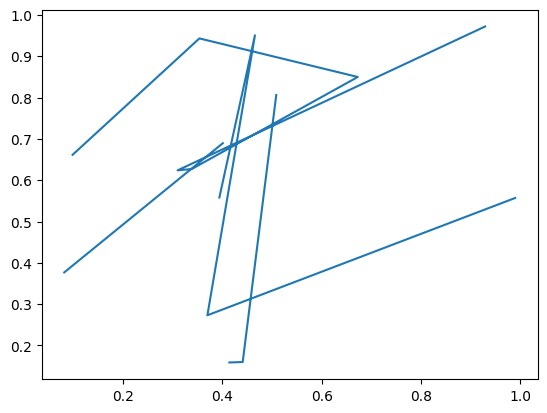

In [21]:
plt.plot(df.col1, df.col2)  # plot line of 'col2' against 'col1' in Euclidean space

<Axes: xlabel='col1', ylabel='col2'>

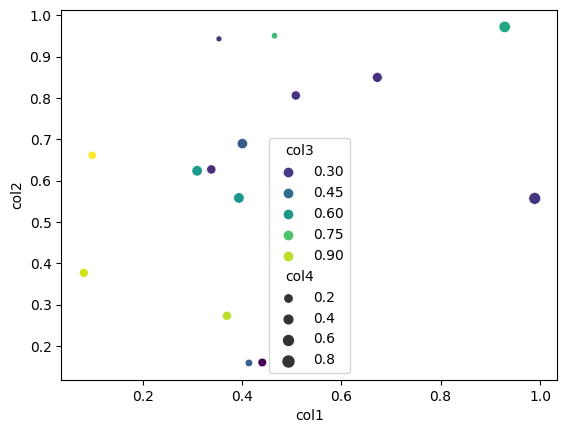

In [22]:
sns.scatterplot(data=df, x='col1', y='col2', hue='col3', size='col4', palette='viridis')

<Axes: >

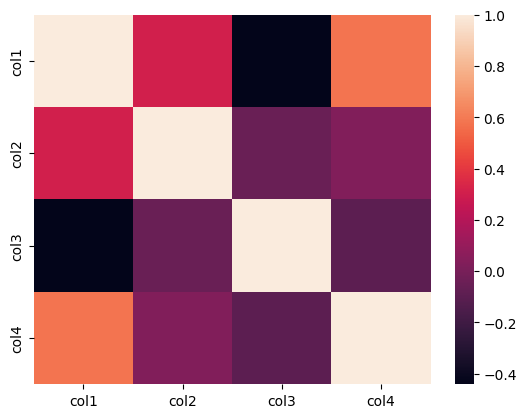

In [23]:
sns.heatmap(df.corr(), label=True)  # make a heatmap of cross-correlations

## Interactive plotting

In [24]:
pd.options.plotting.backend = "plotly"  # set pandas plotting backend to the interactive visualisation platform 'plotly'
df.plot()

In [25]:
df.plot(kind='box')

In [26]:
df.plot(kind='scatter')

In [27]:
import pandas_bokeh
pandas_bokeh.output_notebook()
df.plot_bokeh()

Figure(id='1002', ...)

# Statistics

## Classical statistics

In [28]:
df  # let's have another look at our data frame

,col1,col2,col3,col4
0,0.413998,0.158897,0.400620,0.210291
1,0.440866,0.160019,0.154743,0.381217
2,0.508407,0.806086,0.277499,0.464512
3,NaN,NaN,NaN,NaN
4,0.393876,0.558105,0.591635,0.687632
5,0.465518,0.950583,0.721949,0.068630
6,0.369786,0.273084,0.898696,0.438025
7,0.989504,0.556958,0.282022,0.955505
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [29]:
df.describe()  # pandas gives us basic statistics, ignoring NA values

,col1,col2,col3,col4
count,15.000000,15.000000,15.000000,15.000000
mean,0.451079,0.613819,0.514435,0.480604
std,0.251830,0.272874,0.275137,0.266474
min,0.081593,0.158897,0.154743,0.024530
25%,0.346003,0.466934,0.281558,0.345288
50%,0.400869,0.627058,0.400620,0.461313
75%,0.486963,0.827922,0.685713,0.672899
max,0.989504,0.971955,0.987318,0.955505


Pingouin offers a wide range of test statistics that are both easy and intuitive to deploy and interpret; it also offers some nice plotting options. All functions can be found here: https://pingouin-stats.org/build/html/api.html#

In [30]:
import pingouin as pg
pg.ttest(df.col1, df.col2)  # run a simple independent t-test on 'col1' and 'col2'

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.697431,28,two-sided,0.100705,"[-0.36, 0.03]",0.619814,1.001,0.374379


In [31]:
pg.ttest(df.col1, df.col2, paired=True)  # assuming these are paired samples

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.034089,14,two-sided,0.061344,"[-0.33, 0.01]",0.619814,1.314,0.608007


In [32]:
plt.ioff()  # turns automatic display of plots off (otherwise plots below are shown twice)

/usr/local/lib/python3.10/dist-packages/pingouin/plotting.py:818: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

/usr/local/lib/python3.10/dist-packages/pingouin/plotting.py:869: UserWarning:

FixedFormatter should only be used together with FixedLocator



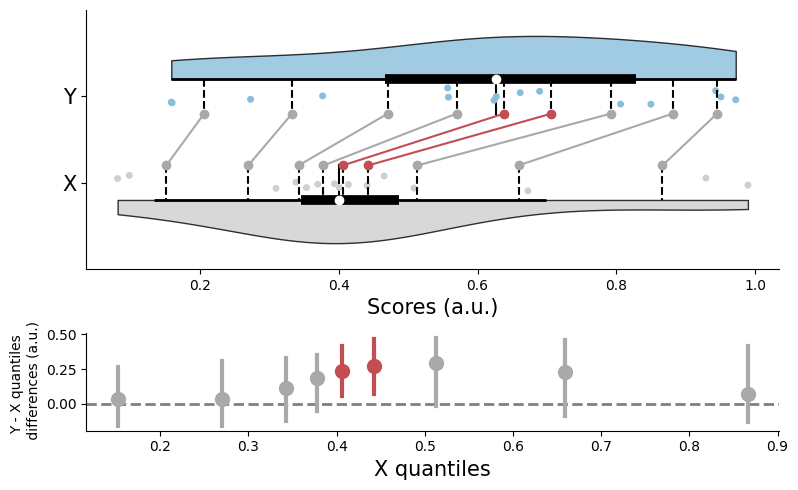

In [33]:
pg.plot_shift(df.dropna().col1, df.dropna().col2)  # pingouin can also do some plotting

## Transforming data frames from wide to long format

While many of us are used to collecting data in "wide format" in which different kinds of measurements are simply added as additional columns, this format quickly breaks down if we're dealing with multidimensional data (imagine we were collecting both behavioural performance values for each mouse per day as well as their respective weight). To get the most out of data frames, we need to transform data frames into a long format then, in which the kind of measurement is specified in one column, and the values are collected in another. This enables enhanced data interrogation and statistics.

In [34]:
df['id'] = df.index  # we're adding an 'id' column based on the data frame index
df

,col1,col2,col3,col4,id
0,0.413998,0.158897,0.400620,0.210291,0
1,0.440866,0.160019,0.154743,0.381217,1
2,0.508407,0.806086,0.277499,0.464512,2
3,NaN,NaN,NaN,NaN,3
4,0.393876,0.558105,0.591635,0.687632,4
5,0.465518,0.950583,0.721949,0.068630,5
6,0.369786,0.273084,0.898696,0.438025,6
7,0.989504,0.556958,0.282022,0.955505,7
8,NaN,NaN,NaN,NaN,8
9,NaN,NaN,NaN,NaN,9


In [35]:
df_long = df.melt(var_name='measurement', id_vars='id')  # transformation into long format
df_long

,id,measurement,value
0,0,col1,0.413998
1,1,col1,0.440866
2,2,col1,0.508407
3,3,col1,NaN
4,4,col1,0.393876
...,...,...,...
75,15,col4,0.309360
76,16,col4,NaN
77,17,col4,NaN
78,18,col4,0.425241


# Group df_long by the measurement column

you can specify how you want to group. You can use .mean() for example to get the mean of all items in the measurement column as values in a grouped dataframe. But you can also for example use .sum() to get the sum for each item in the measurement column. Note that you have to specify the column you want to group by as a string.

In [37]:
df_long_grouped_mean = df_long.groupby('measurement').mean()
df_long_grouped_mean

,id,value
measurement,,
col1,9.5,0.451079
col2,9.5,0.613819
col3,9.5,0.514435
col4,9.5,0.480604


In [42]:
df_long_grouped_sum = df_long.groupby('measurement').sum()
df_long_grouped_sum

,id,value
measurement,,
col1,190,6.766188
col2,190,9.207288
col3,190,7.716531
col4,190,7.209063


# Let's drop the id column from the grouped dataframe

axis=1 specifies that it's a column we want to drop, not a row (axis=0)

In [44]:
df_long_grouped_sum_no_id = df_long_grouped_sum.drop('id',axis=1)
df_long_grouped_sum_no_id

,value
measurement,
col1,6.766188
col2,9.207288
col3,7.716531
col4,7.209063


In [ ]:
plt.ion()  # interactive mode on

<Axes: xlabel='measurement', ylabel='value'>

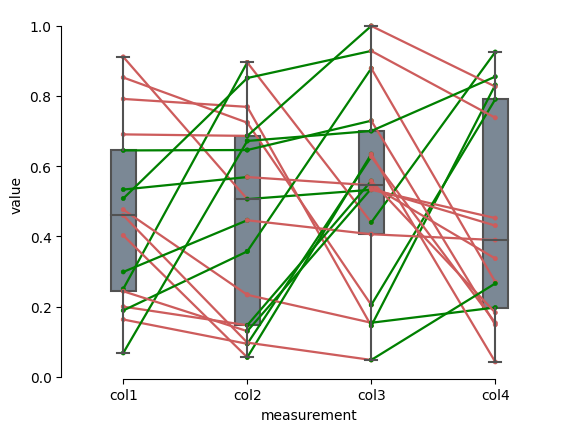

In [ ]:
pg.plot_paired(data=df_long, within='measurement', subject='id', dv='value')  # let's plot the data pretending we have four measurements from 20 subjects

In [ ]:
pg.rm_anova(data=df_long, within='measurement', subject='id', dv='value')  # running a repeated-measures ANOVA across measurements

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,measurement,3,48,0.403101,0.751415,0.694784,0.013972,0.749219,False,0.43855,0.033356


In [ ]:
pg.pairwise_tests(data=df_long, within='measurement', subject='id', dv='value', padjust='bonf')  # post-hoc tests using Bonferroni correction

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,measurement,col1,col2,True,True,-0.156644,16.0,two-sided,0.877485,1.0,bonf,0.252,-0.040790
1,measurement,col1,col3,True,True,-0.798666,16.0,two-sided,0.436180,1.0,bonf,0.33,-0.296090
2,measurement,col1,col4,True,True,-0.106322,16.0,two-sided,0.916649,1.0,bonf,0.25,-0.031365
3,measurement,col2,col3,True,True,-0.789976,16.0,two-sided,0.441093,1.0,bonf,0.328,-0.239923
4,measurement,col2,col4,True,True,0.057285,16.0,two-sided,0.955027,1.0,bonf,0.249,0.008252
5,measurement,col3,col4,True,True,0.742989,16.0,two-sided,0.468258,1.0,bonf,0.318,0.244420


## Estimation statistics

Classical statistics have various shortcomings that can be overcome by using estimation statistics. The [DABEST package](https://acclab.github.io/DABEST-python-docs/index.html) from the Claridge-Chang lab makes it fairly easy to employ and visualise.

In [ ]:
import dabest
df_dabest = dabest.load(df, idx=('col1', 'col2', 'col3', 'col4'), paired='sequential', id_col='id')  # load data frame as a dabest object
df_dabest

DABEST v2023.02.14
                  
Good evening!
The current time is Mon Sep 11 19:37:38 2023.

Paired effect size(s) for the sequential design of repeated-measures experiment 
with 95% confidence intervals will be computed for:
1. col2 minus col1
2. col3 minus col2
3. col4 minus col3

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
df_dabest.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,col1,col2,17,17,mean difference,sequential,0.011475,95,-0.112534,0.162956,0.8832,0.746658,69.0,0.877485,-0.156644
1,col2,col3,17,17,mean difference,sequential,0.069927,95,-0.109923,0.223661,0.4666,0.430679,59.0,0.441093,-0.789976
2,col3,col4,17,17,mean difference,sequential,-0.072421,95,-0.239638,0.133618,0.4832,0.430679,59.0,0.468258,0.742989


In [ ]:
plt.ioff()

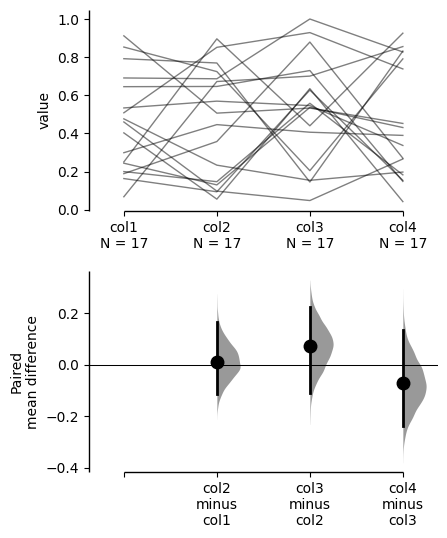

In [ ]:
df_dabest.mean_diff.plot()